###### SPLEX - TME 9
# Bayesian Networks for Clinical Data Analysis
The goal of the TME is to get skills in using the PyAgrum library (http://agrum.gitlab.io/pages/pyagrum.html) and to learn how to construct Bayesian networks and dynamic Bayesian networks.

## I/Libraries
Load packages

In [1]:
import pandas
import numpy
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.bn2graph as bnPlot
import pyAgrum.lib.dynamicBN as gdyn
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt
import os
import pandas as pd

## II/Data (both data sets will be provided during the TME)

* Prediction of Type 2 Diabetes Remission: dynamic data

In [3]:
dyn_data = pd.read_csv('dynamic.txt',sep=' ')
print(dyn_data)

     HbA1C0  HbA1C1  HbA1C2    Gly0  Gly1  Gly2  Poids0  Poids1  Poids2  \
0       6.7     5.9     6.1   6.105   4.7   5.0   110.7    67.0    72.0   
1       6.0     5.2     5.2   6.327   4.0   4.9   177.0   127.0   143.6   
2       6.8     5.9     6.6   7.881   6.0   6.4   133.4   110.0   115.0   
3       9.4     7.7     8.4  11.700   9.1   7.9    95.2    80.0    85.1   
4       8.0     5.7     5.9  10.700   5.4   5.6   120.0    92.1    84.7   
..      ...     ...     ...     ...   ...   ...     ...     ...     ...   
170     6.8     5.3     6.1   5.300   6.0   5.3   105.6    73.3    75.0   
171     7.6     5.5     7.9   4.500   4.7  10.6   146.7    96.4    88.8   
172     6.3     6.1     5.9   5.600   5.4   5.0   102.0    81.4    89.6   
173     5.9     6.3     6.3   5.500   5.4   7.7    90.5    73.0    78.0   
174     6.8     7.7     5.3   6.100   8.8   4.4   141.4    96.1    86.0   

     Status0  Status1  Status2  
0          1        1        3  
1          1        1        1  


* Host and Environmental Data of Obese Patients

In [4]:
host_data=pd.read_csv('SPLEX_host.txt',sep=' ')
print(host_data)

    Sexe  Age  cBMI_corp  cTT_corp  cTH_corp     cWHR  cMGkg_corp  \
0      2   41   -0.93755       5.0      -1.0  0.05389       -2.53   
1      1   50   -2.54899      -9.0      -5.0 -0.04326       -2.69   
2      1   56   -1.23884       0.0       1.0 -0.00787        0.33   
3      1   34   -2.90913     -15.0      -6.0 -0.07791       -2.82   
4      1   56   -2.47137     -11.0      -4.0 -0.07015       -3.97   
5      1   60   -1.84604      -5.0      -7.0  0.00941       -3.95   
6      1   26   -1.76509     -17.0      -2.0 -0.12289       -6.15   
7      1   26   -2.94427     -10.0       0.0 -0.08772       -3.25   
8      2   34   -2.23798      -3.5      -3.5 -0.00214       -3.44   
9      1   41   -2.72857       9.0     -16.0  0.19380       -4.68   
10     2   35   -2.66892      -6.0      -3.0 -0.02419       -5.14   
11     1   31   -2.95331     -10.0      -8.0 -0.02961       -5.13   
12     1   33   -0.70517      -4.0      -2.0 -0.01987        0.00   
13     1   53   -1.52038      -5.0

In [5]:
env_data = pd.read_csv('SPLEX_env.txt',sep=' ')
print(env_data)

    cWI_ap  cSI_ap  cLI_ap  Food_intake_alim  Water_alim  Pr_alim  \
0       12       8       2                44          33       15   
1        1       7       1                18          37       43   
2        7      12      14                21          20       25   
3       11       2       7                23          43       28   
4       11      11       2                 3           1       45   
5       17       8      13                28          16       20   
6        4       7       8                43          10        9   
7        2       1       3                35           8       44   
8       14       9       1                43          10        9   
9       11       8       1                19          26       40   
10      13       8       1                22          34       30   
11      13       2       6                 1          29       12   
12      11       9       8                13          30       41   
13       5       2       1        

## III/Analysis

### 1. Creating a network using PyAgrum. We would like to model the problem of type 2 diabetes remission after a gastric by-pass surgery which can be represented by the following graph (note, that the problem is simplified extremely!):

The level of glycemia has an important impact on whether insulin or other glucose lowering agents are taken or not. The diabetes remission heavily depends on the number of drugs taken.
The conditional probability tables (CPT) associated with each node of the network are given as follows:

• Create an empty Bayesian Network (BN) and add nodes

In [6]:
# Create an empty BN with a 'name' property.
BN = gum.BayesNet('DiabetesRemission')
print(BN)

# Create the variables
## PyAgrum(aGrUM) provides 3 types of variables : LabelizedVariable ; RangeVariable ; DiscretizedVariable.
## Here, we will use LabelizedVariable, which is a variable whose domain is a finite set of labels. 
## We will create a variable named 'c', with 2 values and described as 'cloudy?', and add it to the BN. The value returned is the id of the node in the graphical structure (the DAG). 
## PyAgrum actually distinguishes the random variable (here the labelizedVariable) from its node in the DAG: the latter is identified through a numeric id. Of course, pyAgrum provides functions to get the id of a node given the corresponding variable and conversely.
GlycemiaLevel = BN.add(gum.LabelizedVariable('Glycemia','cloudy ?',2))
print(GlycemiaLevel)
## You can go on adding nodes in the network this way. 
Insuline, OtherDrugs, Remission = [ BN.add(name, 2) for name in ["Insuline","OtherDrugs","Remission"] ] #BN.add(name, 2) === BN.add(gum.LabelizedVariable(name, name, 2))
print(Insuline, OtherDrugs, Remission)
print(BN)

BN{nodes: 0, arcs: 0, domainSize: 1, dim: 0}
0
1 2 3
BN{nodes: 4, arcs: 0, domainSize: 16, dim: 8}


• Create the arcs and the probability tables

In [7]:
# Create the arcs
## Now we have to connect nodes, i.e., to add arcs linking the nodes. (Reminder : c and s are ids for nodes).
BN.addArc(GlycemiaLevel,Insuline)
for link in [(GlycemiaLevel,OtherDrugs),(Insuline,Remission),(OtherDrugs,Remission)]:
    BN.addArc(*link)
print(BN)
## pyAgrum provides tools to display BN in more user-frendly fashions. Notably, pyAgrum.lib is a set of tools written in pyAgrum to help using aGrUM in python. pyAgrum.lib.notebook adds dedicated functions for iPython notebook.
BN

BN{nodes: 4, arcs: 4, domainSize: 16, dim: 18}


(gum::BayesNet<double>@0x7fa67b16ce00) BN{nodes: 4, arcs: 4, domainSize: 16, dim: 18}

In [8]:
# Create the probability tables
print('No = 0\nYes = 1')
## Once the network topology is constructed, we must initialize the conditional probability tables (CPT) distributions. 
## Each CPT is considered as a Potential object in pyAgrum. There are several ways to fill such an object.
## To get the CPT of a variable, use the cpt method of your BayesNet instance with the variable's id as parameter.
## Now we are ready to fill in the parameters of each node in our network. There are several ways to add these parameters.
### 1) Low-level way
BN.cpt(GlycemiaLevel).fillWith([0.5,0.5])
### Most of the methods using a node id will also work with name of the random variable.
#BN.cpt('Glycemia').fillWith([0.5,0.5])
print(BN.cpt(GlycemiaLevel))
BN.cpt(GlycemiaLevel)

No = 0
Yes = 1
<Glycemia:0> :: 0.5 /<Glycemia:1> :: 0.5


(gum::Potential<double>@0x7fa679e61cc0) <Glycemia:0> :: 0.5 /<Glycemia:1> :: 0.5

In [11]:
### 2) Using the order of variables
BN.cpt(Insuline).var_names

['Glycemia', 'Insuline']

In [12]:
BN.cpt(Insuline)[:] = [[0.9,0.1],[0.1,0.9]]
print(BN.cpt(Insuline))
BN.cpt(Insuline)
### The same process can be performed in several steps:
#BN.cpt(Insuline)[0,:] = [0.9,0.1]
#BN.cpt(Insuline)[1,:] = [0.1,0.9]
#print(BN.cpt(Insuline))
#BN.cpt(Insuline)

<Insuline:0|Glycemia:0> :: 0.9 /<Insuline:1|Glycemia:0> :: 0.1 /<Insuline:0|Glycemia:1> :: 0.1 /<Insuline:1|Glycemia:1> :: 0.9


(gum::Potential<double>@0x7fa679e61800) <Insuline:0|Glycemia:0> :: 0.9 /<Insuline:1|Glycemia:0> :: 0.1 /<Insuline:0|Glycemia:1> :: 0.1 /<Insuline:1|Glycemia:1> :: 0.9

In [13]:
BN.cpt(Remission).var_names

['OtherDrugs', 'Insuline', 'Remission']

In [14]:
BN.cpt(Remission)[0,0,:] = [0.1, 0.9] # otherdrugs=0,insuline=0
BN.cpt(Remission)[0,1,:] = [0.7, 0.3] # otherdrugs=0,insuline=1
BN.cpt(Remission)[1,0,:] = [0.4, 0.6] # otherdrugs=1,insuline=0
BN.cpt(Remission)[1,1,:] = [0.9, 0.1] # otherdrugs=1,insuline=1
print(BN.cpt(Remission))
BN.cpt(Remission)
### 3) Using a dictionnary
### This is probably the most convenient way:
#BN.cpt(Remission)[{'OtherDrugs': 1, 'Insuline': 1}] = [0.9, 0.1]
#BN.cpt(Remission)[{'OtherDrugs': 1, 'Insuline': 0}] = [0.4, 0.6]
#BN.cpt(Remission)[{'OtherDrugs': 0, 'Insuline': 1}] = [0.7, 0.3]
#BN.cpt(Remission)[{'OtherDrugs': 0, 'Insuline': 0}] = [0.1, 0.9]
#BN.cpt(Remission)

<Remission:0|Insuline:0|OtherDrugs:0> :: 0.1 /<Remission:1|Insuline:0|OtherDrugs:0> :: 0.9 /<Remission:0|Insuline:1|OtherDrugs:0> :: 0.7 /<Remission:1|Insuline:1|OtherDrugs:0> :: 0.3 /<Remission:0|Insuline:0|OtherDrugs:1> :: 0.4 /<Remission:1|Insuline:0|OtherDrugs:1> :: 0.6 /<Remission:0|Insuline:1|OtherDrugs:1> :: 0.9 /<Remission:1|Insuline:1|OtherDrugs:1> :: 0.1


(gum::Potential<double>@0x7fa679ec2ef0) <Remission:0|Insuline:0|OtherDrugs:0> :: 0.1 /<Remission:1|Insuline:0|OtherDrugs:0> :: 0.9 /<Remission:0|Insuline:1|OtherDrugs:0> :: 0.7 /<Remission:1|Insuline:1|OtherDrugs:0> :: 0.3 /<Remission:0|Insuline:0|OtherDrugs:1> :: 0.4 /<Remission:1|Insuline:0|OtherDrugs:1> :: 0.6 /<Remission:0|Insuline:1|OtherDrugs:1> :: 0.9 /<Remission:1|Insuline:1|OtherDrugs:1> :: 0.1

In [15]:
### The use of dictionaries is a feature borrowed from OpenBayes. It facilitates the use and avoid common errors that happen when introducing data into the wrong places.
BN.cpt(OtherDrugs)[{'Glycemia':0}] = [0.7, 0.3]
BN.cpt(OtherDrugs)[{'Glycemia':1}] = [0.25, 0.75]
print(BN.cpt(OtherDrugs))
BN.cpt(OtherDrugs)
#BN.cpt(OtherDrugs)[:]=[[0.7,0.3],[0.25,0.75]]
#BN.cpt(OtherDrugs)

<OtherDrugs:0|Glycemia:0> :: 0.7 /<OtherDrugs:1|Glycemia:0> :: 0.3 /<OtherDrugs:0|Glycemia:1> :: 0.25 /<OtherDrugs:1|Glycemia:1> :: 0.75


(gum::Potential<double>@0x7fa679ec0080) <OtherDrugs:0|Glycemia:0> :: 0.7 /<OtherDrugs:1|Glycemia:0> :: 0.3 /<OtherDrugs:0|Glycemia:1> :: 0.25 /<OtherDrugs:1|Glycemia:1> :: 0.75

• Visualize the graph

In [16]:
BN

# Input/output
## Now our BN is complete. It can be saved in different format :
#print(gum.availableBNExts())
#gum.saveBN(BN,os.path.join("out","DiabetesRemission.bif"))
#with open(os.path.join("out","DiabetesRemission.bif"),"OtherDrugs") as out:
#    print(out.read())
#BN2=gum.loadBN(os.path.join("out","DiabetesRemission.bif"))
## We can also save and load it in other formats
#gum.saveBN(BN,os.path.join("out","DiabetesRemission.net"))
#with open(os.path.join("out","DiabetesRemission.net"),"OtherDrugs") as out:
#    print(out.read())
#BN3=gum.loadBN(os.path.join("out","DiabetesRemission.net"))

(gum::BayesNet<double>@0x7fa67b16ce00) BN{nodes: 4, arcs: 4, domainSize: 16, dim: 18}

• Perform inference (with LazyPropagation())

In [18]:
## Two inference engines are currently available in pyAgrum:
## • LazyPropagation: an exact inference method that transforms the Bayesian network into a hypergraph called a join tree or a junction tree. This tree is constructed in order to optimize inference computations.
## • Gibbs : an approximate inference engine using the Gibbs sampling algorithm to generate a sequence of samples from the joint probability distribution.

ie = gum.LazyPropagation(BN)

• Perform inference with evidence. What is the probability to get the remission if the glycemia level is less than 6.5 and no drugs are taken?

In [19]:
## • Inference without evidence
### ie.makeInference()
### print (ie.posterior(w))
## With notebooks, it can be viewed as an HTML table
### ie.posterior(w)

## • Inference with evidence
## Suppose now that you know that the sprinkler is on and that it is not cloudy, and you wonder what Is the probability of the grass being wet, i.e., you are interested in distribution  𝑃(𝑊|𝑆=1,𝐶=0) .
## The new knowledge you have (sprinkler is on and it is not cloudy) is called evidence. Evidence is entered using a dictionary. When you know precisely the value taken by a random variable, the evidence is called a hard evidence. This is the case, for instance, when I know for sure that the sprinkler is on. In this case, the knowledge is entered in the dictionary as 'variable name':label
ie.setEvidence({'Glycemia':0, 'OtherDrugs': 0})
ie.makeInference()
ie.posterior(Remission)

(gum::Potential<double>@0x7fa679ecbc00) <Remission:0> :: 0.16 /<Remission:1> :: 0.84

In [20]:
print('The probability to get remission if the glycemia level is less than 6.5 (Glycemia = 0) and no drugs are taken (OtherDrugs = 0) is 0,84.')

The probability to get remission if the glycemia level is less than 6.5 (Glycemia = 0) and no drugs are taken (OtherDrugs = 0) is 0,84.


• What is the probability to get remission if the glycemia level is bigger than 6.5 and insulin is prescribed?

In [21]:
ie.setEvidence({'Glycemia':1, 'Insuline': 1})
ie.makeInference()
ie.posterior(Remission)

(gum::Potential<double>@0x7fa679ecbf30) <Remission:0> :: 0.85 /<Remission:1> :: 0.15

In [20]:
print('The probability to get remission if the glycemia level is bigger than 6.5 (Glycemia = 1) and insuline is prescribed (Insuline = 1) is 0,15.')

The probability to get remission if the glycemia level is bigger than 6.5 (Glycemia = 1) and insuline is prescribed (Insuline = 1) is 0,15.


In [21]:
## When you have incomplete knowledge about the value of a random variable, this is called a soft evidence. In this case, this evidence is entered as the belief you have over the possible values that the random variable can take, in other words, as P(evidence|true value of the variable). 
## Imagine for instance that you think that if the sprinkler is off, you have only 50% chances of knowing it, but if it is on, you are sure to know it. Then, your belief about the state of the sprinkler is [0.5, 1] and you should enter this knowledge as shown below. 
## Of course, hard evidence are special cases of soft evidence in which the beliefs over all the values of the random variable but one are equal to 0.
#ie.setEvidence({'Insuline': [0.5, 1], 'Glycemia': [1, 0]})
#ie.makeInference()
#ie.posterior(Remission) # using gnb's feature

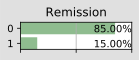

In [24]:
## The pyAgrum.lib.notebook utility proposes certain functions to graphically show distributions.
gnb.showProba(ie.posterior(Remission))

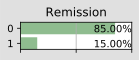

In [22]:
gnb.showPosterior(BN,{'Insuline':1,'Glycemia':1},'Remission')

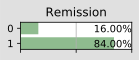

In [23]:
gnb.showPosterior(BN,{'Glycemia':0,'OtherDrugs':0},'Remission')

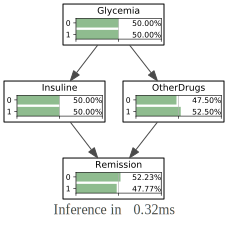

In [25]:
## • Inference in the whole Bayes network
gnb.showInference(BN,evs={})

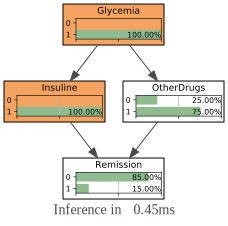

In [26]:
### 1) Inference with evidence
gnb.showInference(BN,evs={'Insuline':1,'Glycemia':1})

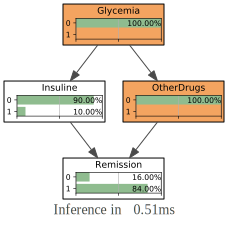

In [27]:
gnb.showInference(BN,evs={'Glycemia':0,'OtherDrugs':0})
### 2) Inference with soft and hard evidence
#gnb.showInference(BN,evs={'Insuline':1,'GlycemiaLevel':[0.3,0.9]})
### 3) Inference with partial targets
#gnb.showInference(BN,evs={'GlycemiaLevel':[0.3,0.9]},targets={'GlycemiaLevel','Remission'})

The following example can help you:
http://www-desir.lip6.fr/~phw/aGrUM/docs/last/notebooks/01-tutorial.ipynb.html

### 2. Construct Bayesian networks from real data. The data are in SPLEX env.txt and SPLEX host.txt files. Construct one network for the environmental variables, one for the host variables, and one with both environmental and host data.

• Load and discretize the data (the Bayesian networks are learned from discrete data only)

To discretize the data, each column into 5 bins, you can:
    l=[]
    for col in data.columns.values:
        bins = numpy.linspace(min(data[col]), max(data[col]), 5)
        l.append(panda.DataFrame(numpy.digitize(data[col], bins),columns=[col]))

    discr_data=panda.concat(l, join='outer', axis=1)
    discr_data.to_csv("data/discr_data.csv",index=False)

In [28]:
#Loading done previously

#Descretize data
l1 = []
for col in env_data.columns.values:
    bins = numpy.linspace(min(env_data[col]), max(env_data[col]), 5)
    l1.append(pandas.DataFrame(numpy.digitize(env_data[col], bins),columns=[col]))
discr_env_data = pandas.concat(l1, join='outer', axis=1)
discr_env_data.to_csv("discr_env_data.csv",index=False)
print(discr_env_data)
l2 = []
for col in host_data.columns.values:
    bins = numpy.linspace(min(host_data[col]), max(host_data[col]), 5)
    l2.append(pandas.DataFrame(numpy.digitize(host_data[col], bins),columns=[col]))
discr_host_data = pandas.concat(l2, join='outer', axis=1)
discr_host_data.to_csv("=discr_host_data.csv",index=False)
print(discr_host_data)

    cWI_ap  cSI_ap  cLI_ap  Food_intake_alim  Water_alim  Pr_alim  \
0        3       3       1                 4           3        2   
1        1       3       1                 2           4        4   
2        2       5       5                 2           2        3   
3        3       1       2                 3           4        3   
4        3       4       1                 1           1        5   
5        4       3       4                 3           2        2   
6        1       3       3                 4           1        1   
7        1       1       1                 4           1        4   
8        4       3       1                 4           1        1   
9        3       3       1                 2           3        4   
10       3       3       1                 2           4        3   
11       3       1       2                 1           3        2   
12       3       3       3                 2           3        4   
13       1       1       1        

• Run a learner to learn a networks (test useLocalSearchWithTabuList() and useGreedyHillClimbing() functions)

    learner=gum.BNLearner("data/discr_data.csv")
    learner.useLocalSearchWithTabuList()
    bn=learner.learnBN()

In [29]:
learner_LocalSearch_env = gum.BNLearner("discr_env_data.csv")
learner_LocalSearch_env.useLocalSearchWithTabuList()
bn_LocalSearch_env = learner_LocalSearch_env.learnBN()
bn_LocalSearch_env

learner_Greedy_env = gum.BNLearner("discr_env_data.csv")
learner_Greedy_env.useGreedyHillClimbing()
bn_Greedy_env = learner_Greedy_env.learnBN()
bn_Greedy_env

(gum::BayesNet<double>@0x7fa67bc0f000) BN{nodes: 63, arcs: 12, domainSize: 10^43.1935, dim: 771}

In [36]:
learner_LocalSearch_host = gum.BNLearner("discr_host_data.csv")
learner_LocalSearch_host.useLocalSearchWithTabuList()
bn_LocalSearch_host = learner_LocalSearch_host.learnBN()
bn_LocalSearch_host

learner_Greedy_host = gum.BNLearner("discr_host_data.csv")
learner_Greedy_host.useGreedyHillClimbing()
bn_Greedy_host = learner_Greedy_host.learnBN()
bn_Greedy_host

(gum::BayesNet<double>@0x7fa67a011600) BN{nodes: 45, arcs: 24, domainSize: 10^30.5712, dim: 1253}

• Save the obtained networks (you can use dotize(bn, filename, format=’pdf’) function)

In [31]:
bnPlot.dotize(bn_LocalSearch_env, 'network_bn_LocalSearch_env', format='pdf')
gnb.showBN(bn_LocalSearch_env)

bnPlot.dotize(bn_Greedy_env, 'network_bn_Greedy_env', format='pdf')
gnb.showBN(bn_Greedy_env)

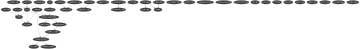

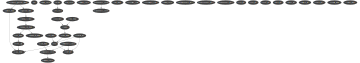

In [37]:
bnPlot.dotize(bn_LocalSearch_host, 'network_bn_LocalSearch_host', format='pdf')
gnb.showBN(bn_LocalSearch_host)

bnPlot.dotize(bn_Greedy_host, 'network_bn_Greedy_host', format='pdf')
gnb.showBN(bn_Greedy_host)

• Are the networks learned with useLocalSearchWithTabuList() and useGreedyHillClimbing() similar?

In [33]:
print('The networks learned with useLocalSearchWithTabuList() and useGreedyHillClimbing() are similar but not identical. ')

The networks learned with useLocalSearchWithTabuList() and useGreedyHillClimbing() are similar but not identical. 


### 3. Dynamic Bayesian networks. Load data from dynamic.txt. In this file, you have HbA1C (glycated hemoglobin), Gly (glycemia), Poids (weight of patients), and Status (remission, non-remission, or partial remission) for time 0, 1 and 5 years after the surgery. Construct a dynamic network to explore temporal dependencies in the data.

• The first step is to learn a Bayesian network bn dynamic as in the previous task

     HbA1C0  HbA1C1  HbA1C2  Gly0  Gly1  Gly2  Poids0  Poids1  Poids2  \
0         1       2       1     1     1     1       1       1       1   
1         1       2       1     1     1     1       4       3       3   
2         1       2       2     2     2     1       2       2       2   
3         2       4       3     3     4     2       1       1       1   
4         1       2       1     2     2     1       2       2       1   
..      ...     ...     ...   ...   ...   ...     ...     ...     ...   
170       1       2       1     1     2     1       1       1       1   
171       1       2       2     1     1     2       3       2       1   
172       1       2       1     1     2     1       1       1       1   
173       1       3       1     1     2     2       1       1       1   
174       1       4       1     1     4     1       2       2       1   

     Status0  Status1  Status2  
0          5        1        5  
1          5        1        1  
2          5        5   

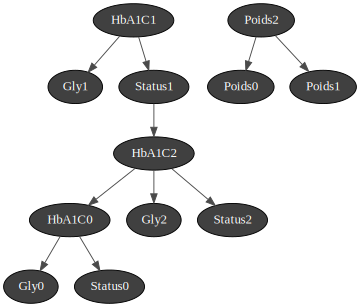

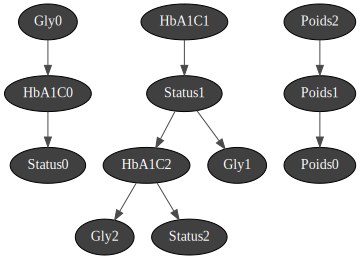

In [34]:
#Loading done previously

#Descretize data
l = []
for col in dyn_data.columns.values:
    bins = numpy.linspace(min(dyn_data[col]), max(dyn_data[col]), 5)
    l.append(pandas.DataFrame(numpy.digitize(dyn_data[col], bins),columns=[col]))
discr_dyn_data = pandas.concat(l, join='outer', axis=1)
discr_dyn_data.to_csv("discr_dyn_data.csv",index=False)
print(discr_dyn_data)

#Run learners to learn the network
##with useLocalSearchWithTabuList()
learner_LocalSearch_dyn = gum.BNLearner("discr_dyn_data.csv")
learner_LocalSearch_dyn.useLocalSearchWithTabuList()
bn_LocalSearch_dyn = learner_LocalSearch_dyn.learnBN()
bn_LocalSearch_dyn
##with useGreedyHillClimbing()
learner_Greedy_dyn = gum.BNLearner("discr_dyn_data.csv")
learner_Greedy_dyn.useGreedyHillClimbing()
bn_Greedy_dyn = learner_Greedy_dyn.learnBN()
bn_Greedy_dyn

#Save obtained networks with the dotize function
##with useLocalSearchWithTabuList()
bnPlot.dotize(bn_LocalSearch_dyn, 'network_bn_LocalSearch_dyn', format='pdf')
gnb.showBN(bn_LocalSearch_dyn)
##with useGreedyHillClimbing()
bnPlot.dotize(bn_Greedy_dyn, 'network_bn_Greedy_dyn', format='pdf')
gnb.showBN(bn_Greedy_dyn)

• Visualize the network with time slices

    gdyn.showTimeSlices(bn_dynamic,format="png")

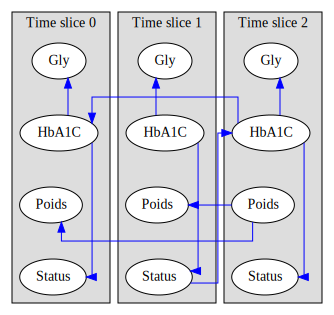

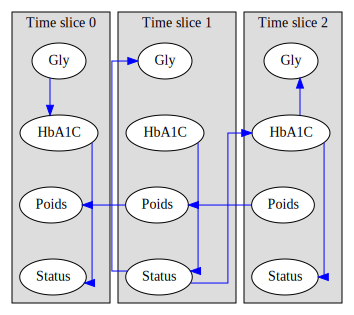

In [39]:
gdyn.showTimeSlices(bn_LocalSearch_dyn,'LocalSerarch_dyn.png')
gdyn.showTimeSlices(bn_Greedy_dyn,"bn_Greedy_dyn.png")

An example of how to construct dynamic Bayesian networks in PyAgrum:
http://www-desir.lip6.fr/~phw/aGrUM/docs/last/notebooks/32-dynamicBn.ipynb.html

You will find more examples here
http://www-desir.lip6.fr/~phw/aGrUM/docs/last/notebooks/